#### 1).Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#### 2).Hypothesis Generation

Hypothesis statement:<br>
NUll hypothesis:    Price of product doesnt affects the item sales<br>
Alternative hypothesis:    Price of product affects the item sales<br>

NUll hypothesis:    Size of store doesnt affects the item sales<br>
Alternative hypothesis:    Size of store affects the item sales<br>

#### 3. Loading packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
# !pip uninstall pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# Training data
df_a = pd.read_csv("Train.csv")

In [4]:
# Test data without target variable
df_b = pd.read_csv("Test.csv")

#### 4. Data Structure and content

In [5]:
df_a.shape, df_b.shape

((8523, 12), (5681, 11))

In [6]:
df_a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_a.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df_a.duplicated().sum()

0

In [9]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [10]:
df_a.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_a['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
# Train data
df_a['Item_Fat_Content'] = df_a['Item_Fat_Content'].map(lambda x : "Regular" if x =="Regular" or x == "reg" else "Low Fat")
df_a['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
# Test data
df_b['Item_Fat_Content'] = df_b['Item_Fat_Content'].map(lambda x : "Regular" if x =="Regular" or x == "reg" else "Low Fat")
df_b['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Unique values

In [14]:
print("Number of unique values are")
print("."*30)
for i in df_a.columns:
    print(i,end=": ")
    print(df_a[i].nunique())

Number of unique values are
..............................
Item_Identifier: 1559
Item_Weight: 415
Item_Fat_Content: 2
Item_Visibility: 7880
Item_Type: 16
Item_MRP: 5938
Outlet_Identifier: 10
Outlet_Establishment_Year: 9
Outlet_Size: 3
Outlet_Location_Type: 3
Outlet_Type: 4
Item_Outlet_Sales: 3493


#### 5).Exploratory Data Analysis

#### 6).Univariate Analysis

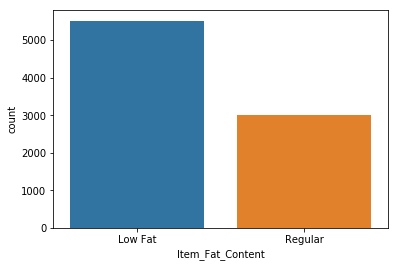

In [15]:
sns.countplot(df_a["Item_Fat_Content"])
plt.show()

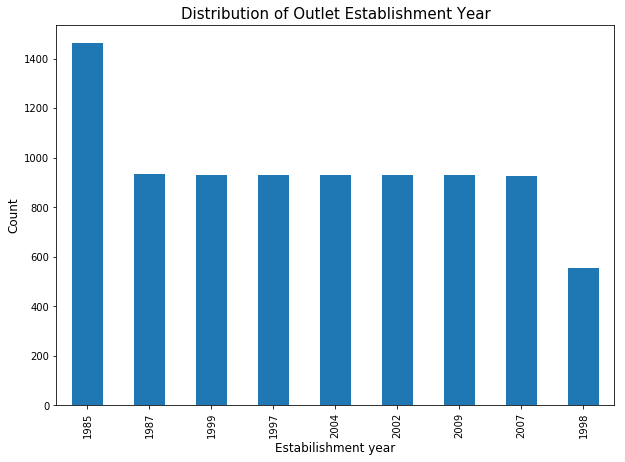

In [16]:
plt.figure(figsize=(10,7))
df_a['Outlet_Establishment_Year'].value_counts().plot.bar() 
plt.title('Distribution of Outlet Establishment Year', fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Estabilishment year",fontsize = 12)
plt.show()

Dataset contains higher number of records from 1985 year and lower records from 1998 year and almost simillar percentage of records from remaining 7 years

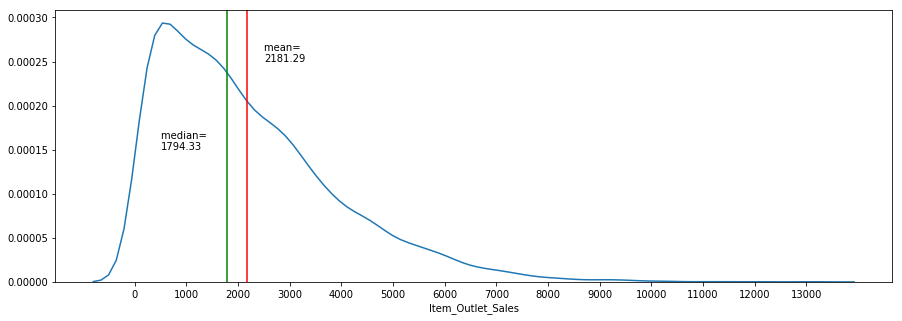

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df_a['Item_Outlet_Sales'],hist=False)
plt.axvline(df_a['Item_Outlet_Sales'].mean(),color='r')
plt.axvline(df_a['Item_Outlet_Sales'].median(),color='g')

plt.text(500,0.00015,'median= \n{}'.format(round(df_a['Item_Outlet_Sales'].median(),2)))
plt.text(2500,0.00025,'mean= \n{}'.format(round(df_a['Item_Outlet_Sales'].mean(),2)))

bins = [i for i in range(0,int(df_a['Item_Outlet_Sales'].max()), 1000)]
plt.xticks(bins)
plt.show()

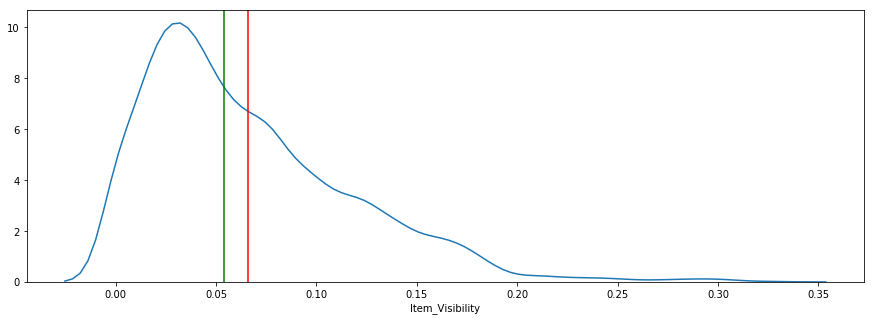

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df_a['Item_Visibility'],hist=False)
plt.axvline(df_a['Item_Visibility'].mean(),color='r')
plt.axvline(df_a['Item_Visibility'].median(),color='g')

Distribution of the sales column is positively skewed, High number of items has low sells

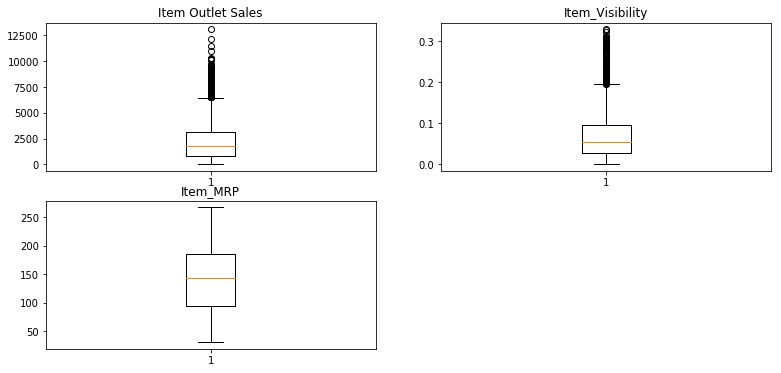

In [19]:
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
plt.boxplot(df_a['Item_Outlet_Sales'])
plt.title("Item Outlet Sales")

plt.subplot(2,2,2)
plt.boxplot(df_a['Item_Visibility'])
plt.title("Item_Visibility")

plt.subplot(2,2,3)
plt.boxplot(df_a['Item_MRP'])
plt.title('Item_MRP')
plt.show()


'Item_Outlet_Sales' and "Item_Visibility" variables has some outliers

#### 7).Bivariate Analysis

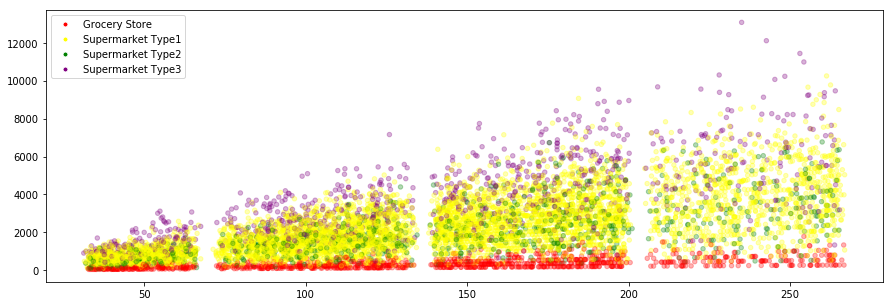

In [20]:
plt.figure(figsize=(15,5))

color_map = {"Grocery Store": "red", "Supermarket Type1": "yellow", "Supermarket Type2": "green", "Supermarket Type3": "purple"}

plt.scatter(df_a["Item_MRP"],df_a["Item_Outlet_Sales"],
            c=[color_map[x] for x in df_a["Outlet_Type"]],
             alpha= 0.3, s = 20 )
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=5, markerfacecolor=value) for key, value in color_map.items()]
plt.legend(handles=legend_labels)
plt.show()

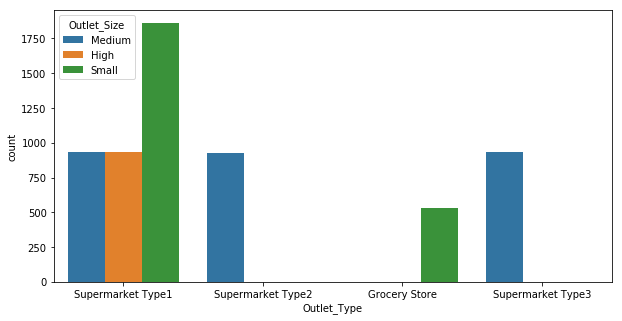

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df_a["Outlet_Type"],hue = df_a['Outlet_Size'])
plt.show()

"Supermarket Type2" and "Supermarket Type3" contains only "medium" size outlets and "Grocery Store" contains only "small" type outlets.

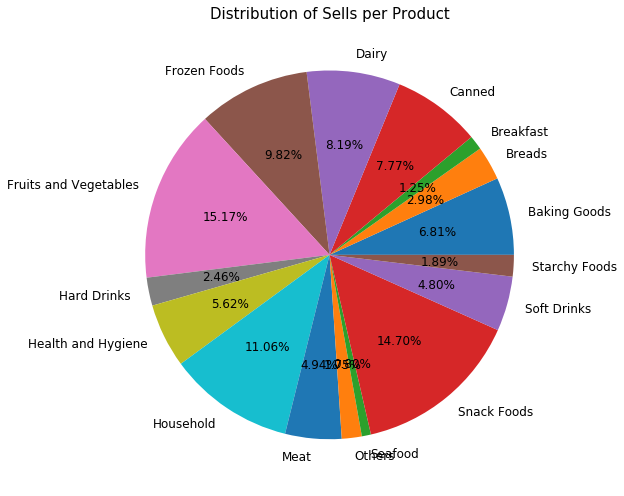

In [22]:
plt.figure(figsize=(10,7))
df_a.groupby("Item_Type")['Item_Outlet_Sales'].sum().plot.pie(autopct = "%1.2f%%",fontsize = 12)
plt.title('Distribution of Sells per Product', fontsize = 15)
plt.ylabel("")
plt.tight_layout()

"Fruits and Vegetables", "Snack Foods" and "Household" type products gives very high sells <br>
whereas "Breakfast","Sea Food", "Starch Foods" and "Hard Drinks" gives very low sells

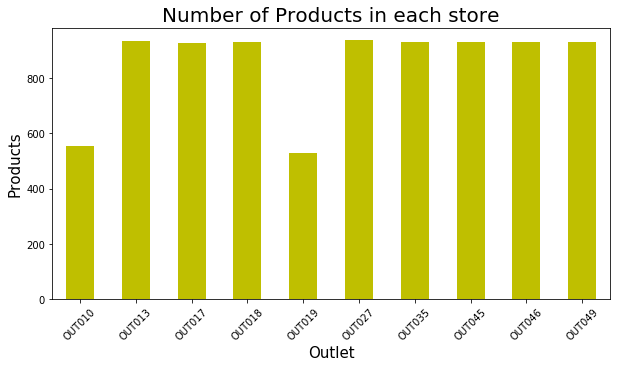

In [23]:
plt.figure(figsize = (10,5))
df_a.groupby('Outlet_Identifier')["Item_Identifier"].count().plot.bar(color ='y')
plt.xticks(rotation = 45)
plt.title("Number of Products in each store", fontsize = 20)
plt.xlabel('Outlet',fontsize = 15)
plt.ylabel('Products',fontsize = 15)
plt.show()


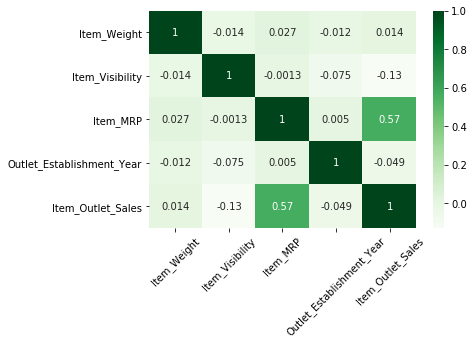

In [24]:
sns.heatmap(data  = df_a.corr(), annot =True, cmap="Greens")
plt.xticks(rotation = 45)
plt.show()

"Item MRP" and "Item Outlet sales" are positively correlated with each other. which means when "Item MRP" increases then "Item Outlet Sales" also increases 

#### Multivariate Analysis

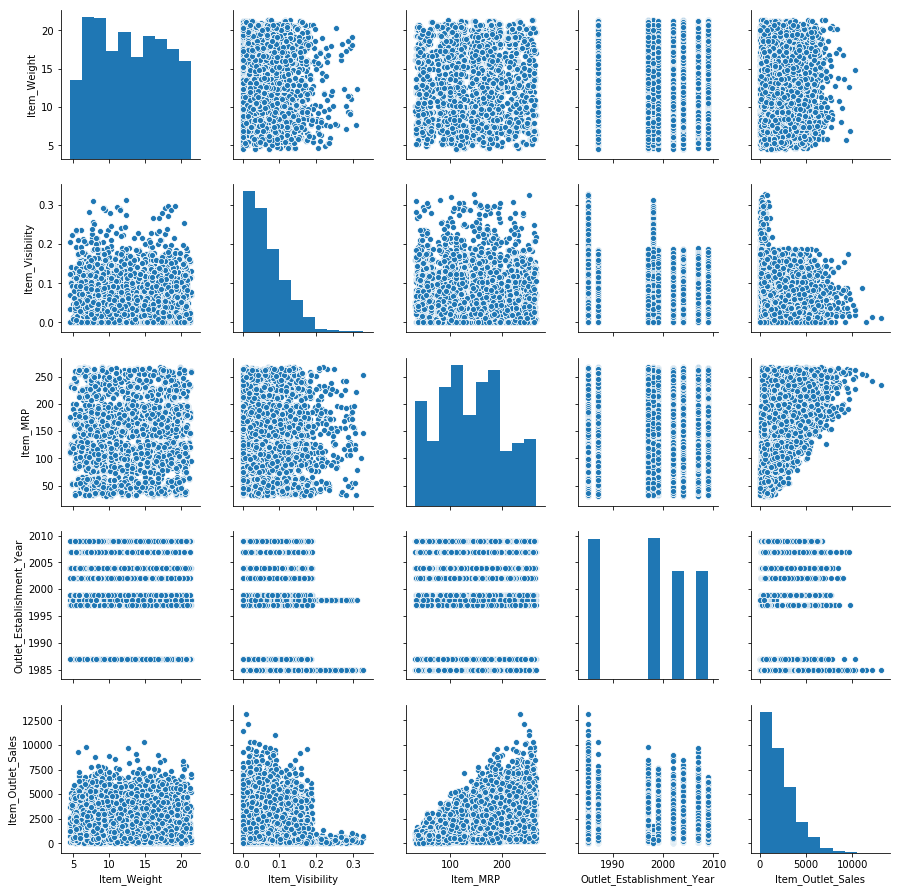

In [25]:
sns.pairplot(df_a)
plt.show()

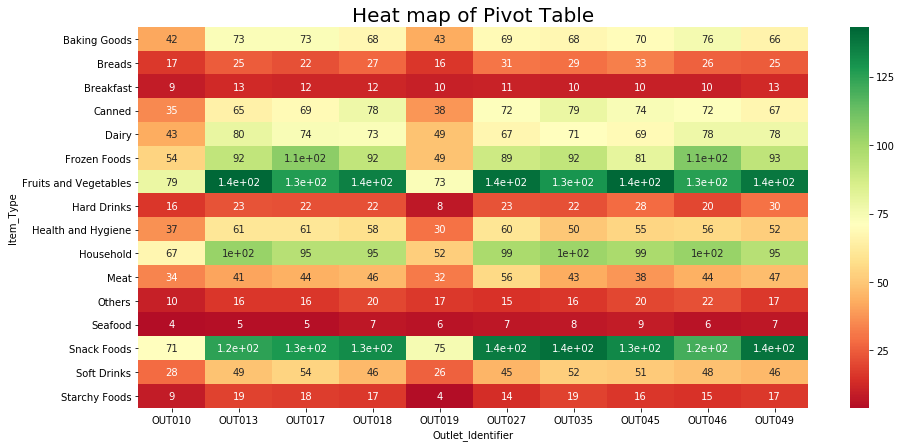

In [26]:
pivot = pd.pivot_table(data = df_a, index  = 'Item_Type',columns= 'Outlet_Identifier',values='Outlet_Type', aggfunc= 'count')

plt.figure(figsize= (15,7))
sns.heatmap(data = pivot,annot = True, cmap = 'RdYlGn',center= np.max(pivot).max()/2)
plt.title("Heat map of Pivot Table" , fontsize =20)
plt.show()

From the Heatmap it seems that "fruits and vegetables" and "snack foods" have higher demmand in almost all stores except "Out010" and "Out019",
where as the "Breakfast" and "seafood" has the lowest demand in all stores

#### 8).Missing Value Treatment

In [27]:
# Training
round(df_a.isna().mean()*100,2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [28]:
# Testing
round(df_b.isna().mean()*100,2)

Item_Identifier               0.00
Item_Weight                  17.18
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
dtype: float64

Imputation for Outlet size column

In [29]:
# Training
# checking missing values as per the store
df_a.groupby(["Outlet_Identifier"])['Outlet_Size'].value_counts(dropna = False)

Outlet_Identifier  Outlet_Size
OUT010             NaN            555
OUT013             High           932
OUT017             NaN            926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             NaN            929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [30]:
# Testing
df_b.groupby(["Outlet_Identifier"])['Outlet_Size'].value_counts(dropna = False)

Outlet_Identifier  Outlet_Size
OUT010             NaN            370
OUT013             High           621
OUT017             NaN            617
OUT018             Medium         618
OUT019             Small          352
OUT027             Medium         624
OUT035             Small          620
OUT045             NaN            619
OUT046             Small          620
OUT049             Medium         620
Name: Outlet_Size, dtype: int64

The Store Size of three Stores is missing in whole data

In [31]:
df_a.groupby(["Outlet_Location_Type",'Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [32]:
# Training
# Imputing missing values
df_a.loc[df_a['Outlet_Type'] == "Grocery Store","Outlet_Size"] = "Small"
df_a.loc[df_a['Outlet_Location_Type'] == "Tier 2","Outlet_Size"] = "Small"
# df.loc[df['Outlet_Location_Type'] == "Tier 2","Outlet_Size"].fillna("Small", inplace =True)

In [33]:
# Testing
# Imputing missing values
df_b.loc[df_b['Outlet_Type'] == "Grocery Store","Outlet_Size"] = "Small"
df_b.loc[df_b['Outlet_Location_Type'] == "Tier 2","Outlet_Size"] = "Small"

For the outlet location "Tier 1" and outlet type " Grocery store" the outlet size is "small", hence imputing "small" outlet size instead of null values.<br>
For the outlet location "Tier 2" all outlet size seems "small", hence imputing outlet size as "small" where outlet location is "Tier 2"


In [34]:
df_a.groupby(["Outlet_Identifier"])['Outlet_Size'].value_counts(dropna = False)

Outlet_Identifier  Outlet_Size
OUT010             Small          555
OUT013             High           932
OUT017             Small          926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             Small          929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

Imputation for "Item_Weight" column

In [35]:
df_a.groupby(["Item_Identifier"])["Item_Weight"].nunique()

Item_Identifier
DRA12    1
DRA24    1
DRA59    1
DRB01    1
DRB13    1
        ..
NCZ30    1
NCZ41    1
NCZ42    1
NCZ53    1
NCZ54    1
Name: Item_Weight, Length: 1559, dtype: int64

Each Item has unique weight, hence imputing respected weight instead of null values

In [36]:
df_a["Item_Weight"] = df_a.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(round(x.mean(),2)))
df_a["Item_Weight"].isna().sum()

4

In [37]:
df_b["Item_Weight"] = df_a.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(round(x.mean(),2)))
df_b["Item_Weight"].isna().sum()

4

In [38]:
df_a[pd.isnull(df_a["Item_Weight"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


weight of 4 Items is not mentioned in given data, hence importing mean value

In [39]:
df_a["Item_Weight"].fillna(df_a["Item_Weight"].mean(),inplace = True)

In [40]:
# df.dropna(inplace = True)
# df[["Item_Weight","Outlet_Size"]].isna().sum()

In [41]:
# Testing
df_b.dropna(inplace = True)
df_b[["Item_Weight","Outlet_Size"]].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

#### 9).Feature Engineering

#### 10).Encoding Categorical Variables
#### 11).Label Encoding

In [42]:
# Assigning "Low Fat":0 and "Regular":1
df_a["Item_Fat_Content"] = df_a["Item_Fat_Content"].map({"Low Fat":0,"Regular":1})
df_a["Item_Fat_Content"].unique()

array([0, 1], dtype=int64)

In [43]:
# Testing
df_b["Item_Fat_Content"] = df_b["Item_Fat_Content"].map({"Low Fat":0,"Regular":1})
df_b["Item_Fat_Content"].unique()

array([0, 1], dtype=int64)

#### 12).One Hot Encoding

In [45]:
Item_Identifier =  pd.get_dummies(df_a['Item_Identifier'],prefix="I_Id_", drop_first=True)
Item_Type =  pd.get_dummies(df_a['Item_Type'],prefix="I_Type_", drop_first=True)

Outlet_Identifier = pd.get_dummies(df_a['Outlet_Identifier'],prefix="O_Id_", drop_first=True)
Outlet_Establishment_Year = pd.get_dummies(df_a['Outlet_Establishment_Year'],prefix="O_Est_Year_", drop_first=True)
Outlet_Size = pd.get_dummies(df_a['Outlet_Size'],prefix="O_Size_", drop_first=True)
Outlet_Location_Type = pd.get_dummies(df_a['Outlet_Location_Type'],prefix="O_Location_", drop_first=True)
Outlet_Type = pd.get_dummies(df_a['Outlet_Type'],prefix="O_Type_", drop_first=True)

In [46]:
df_1 = pd.concat([df_a, Item_Identifier,Item_Type, Outlet_Identifier, Outlet_Establishment_Year,
                  Outlet_Size, Outlet_Location_Type, Outlet_Type], axis = 1)
df_1.shape

(8523, 1609)

In [48]:
df_1.drop(["Item_Identifier","Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year",
                  "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"], axis = 1, inplace = True)
df_1.shape

(8523, 1602)

--------------------------

In [50]:
Item_Identifier =  pd.get_dummies(df_b['Item_Identifier'],prefix="I_Id_", drop_first=True)
Item_Type =  pd.get_dummies(df_b['Item_Type'],prefix="I_Type_", drop_first=True)

Outlet_Identifier = pd.get_dummies(df_b['Outlet_Identifier'],prefix="O_Id_", drop_first=True)
Outlet_Establishment_Year = pd.get_dummies(df_b['Outlet_Establishment_Year'],prefix="O_Est_Year_", drop_first=True)
Outlet_Size = pd.get_dummies(df_b['Outlet_Size'],prefix="O_Size_", drop_first=True)
Outlet_Location_Type = pd.get_dummies(df_b['Outlet_Location_Type'],prefix="O_Location_", drop_first=True)
Outlet_Type = pd.get_dummies(df_b['Outlet_Type'],prefix="O_Type_", drop_first=True)

In [51]:
df_2 = pd.concat([df_b, Item_Identifier,Item_Type, Outlet_Identifier, Outlet_Establishment_Year,
                  Outlet_Size, Outlet_Location_Type, Outlet_Type], axis = 1)
df_2.shape

(5677, 1592)

In [52]:
df_2.drop(["Item_Identifier","Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year",
                  "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"], axis = 1, inplace = True)
df_2.shape

(5677, 1585)

#### 13).PreProcessing Data

Outliers

In data visualization step from distribution plot and box plot it seems that data is positively skewed and some outliers are present in data <br>
Dealing with those outliers

In [54]:
# Fare for Pclass = 1
iqr_sales = df_1["Item_Outlet_Sales"].quantile(0.75) - df_1["Item_Outlet_Sales"].quantile(0.25)
print("Inter Quartile Range : ",round(iqr_sales,2))

lower_bound= df_1["Item_Outlet_Sales"].quantile(0.25) - (1.5*iqr_sales)
upper_bound= df_1["Item_Outlet_Sales"].quantile(0.75) + (1.5*iqr_sales)
print("lower bound of Sales : ",round(lower_bound,2))
print("Upper bound of Sales : ",round(upper_bound,2))

Inter Quartile Range :  2267.05
lower bound of Sales :  -2566.33
Upper bound of Sales :  6501.87


In [55]:
df_1.loc[df_1["Item_Outlet_Sales"]> upper_bound,"Item_Outlet_Sales"].count()/len(df_1)*100

2.1823301654347063

In [56]:
df_1.loc[df_1["Item_Outlet_Sales"]< lower_bound,"Item_Outlet_Sales"].count()/len(df_1)*100

0.0

Two percent of the Outlet Sales has outliers.<br>
Droping outliers

In [57]:
df_1 = df_1[df_1["Item_Outlet_Sales"] < upper_bound]

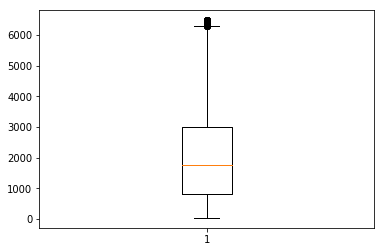

In [58]:
plt.boxplot(df_1["Item_Outlet_Sales"])
plt.show()

Data Transformation

In [61]:
y = df_1.pop('Item_Outlet_Sales')
X = df_1

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Spleating data in training and testing part

In [63]:
# Training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# num_vars = ["Item_Weight","Item_Visibility","Item_MRP"]
# df_1[num_vars] = scaler.fit_transform(df_1[num_vars])


num_vars = ["Item_Weight","Item_Visibility","Item_MRP"]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train_s = X_train

In [64]:
# Testing
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test_s = X_test

In [65]:
# Testing with unknown target variable
df_2[num_vars] = scaler.transform(df_2[num_vars])
X_test_unknown_s =df_2

PCA

In [66]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train_s)

PCA()

In [67]:
pca.explained_variance_

array([9.58218313e-01, 3.71105359e-01, 3.50833388e-01, ...,
       3.65108718e-35, 1.33368527e-35, 6.98131179e-37])

In [68]:
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 18.62286239,  25.83525225,  32.65365869, ..., 100.        ,
       100.        , 100.        ])

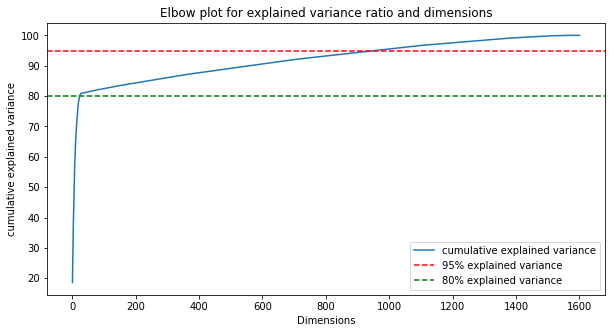

In [70]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(val)+1),val,label="cumulative explained variance")
plt.axhline(y=95,color='r',linestyle='--',label="95% explained variance ")
plt.axhline(y=80,color='g',linestyle='--',label="80% explained variance ")
plt.title("Elbow plot for explained variance ratio and dimensions")
plt.xlabel("Dimensions")
plt.ylabel("cumulative explained variance")
plt.legend()

In [71]:
pca=PCA(n_components=0.8)
pca.fit(X_train_s)

PCA(n_components=0.8)

In [72]:
pca.n_components_

25

In [73]:
# Training
X_train_pca = pd.DataFrame(pca.transform(X_train_s))

In [74]:
# Testing data
X_test_pca = pd.DataFrame(pca.transform(X_test_s))

In [75]:
missing_columns = set(X_train_s.columns) - set(X_test_unknown_s.columns)
for col in missing_columns:
    X_test_unknown_s[col] = 0 

In [76]:
# Testing data with unknown target variable
X_test_unknown_pca = pd.DataFrame(pca.transform(X_test_unknown_s))

In [77]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.635079,-0.722130,-0.459261,-0.103949,-0.962077,0.492562,0.017115,-0.030630,-0.090287,0.043822,...,-0.591670,-0.114492,-0.337178,-0.183191,-0.071164,-0.096986,-0.006697,-0.094577,-0.012470,-0.023481
1,-1.088587,-0.246246,-0.202090,-0.413635,0.106519,-0.608914,-0.794906,-0.817953,-0.112518,-0.051997,...,0.173576,-0.447336,-0.233213,0.004015,-0.031715,-0.041887,-0.029867,-0.113179,-0.037417,-0.004163
2,-1.094265,-0.250377,-0.197856,-0.404566,0.090682,-0.507697,-0.351377,1.126502,-0.107958,-0.069448,...,-0.105631,0.062547,-0.014853,-0.067688,-0.039128,-0.038040,-0.014910,-0.098934,-0.015201,-0.011917
3,-1.090577,-0.242202,-0.230914,-0.351832,-0.028934,0.658679,-0.770473,-0.866056,-0.053482,0.017889,...,0.118780,-0.332287,-0.263612,-0.024253,-0.047676,-0.050648,0.004781,0.152234,-0.015573,-0.038686
4,1.637089,-0.728064,-0.449647,-0.145931,-0.855494,-0.446682,-0.014386,0.023476,-0.141655,0.009988,...,0.214177,-0.269470,-0.072621,0.105799,0.064015,0.105032,0.025184,-0.141482,0.032452,0.066631


------------------------

#### 15).Linear Regression

In [78]:
X_train_pca.columns

RangeIndex(start=0, stop=25, step=1)

In [79]:
new_columns = list(X_train_pca.columns)
new_columns.insert(0, "constant")


Model-1

In [80]:
lm = LinearRegression()
lm.fit(X_train_pca,y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train_pca)

newX = pd.DataFrame({"Constant":np.ones(len(X_train_pca))}).join(pd.DataFrame(X_train_pca))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.loc[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["variables"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [new_columns,params,sd_b,ts_b,p_values]
print(myDF3)

   variables  Coefficients  Standard Errors  t values  Probabilities
0   constant     2053.9364           12.263   167.495          0.000
1          0       48.9551           12.528     3.908          0.000
2          1      392.3368           20.131    19.489          0.000
3          2     -238.7024           20.705   -11.529          0.000
4          3     -387.9747           22.341   -17.366          0.000
5          4      260.2325           24.236    10.737          0.000
6          5      110.6720           24.592     4.500          0.000
7          6      152.0365           26.376     5.764          0.000
8          7       31.2216           26.413     1.182          0.237
9          8    -1534.2308           30.567   -50.192          0.000
10         9       19.6847           32.355     0.608          0.543
11        10     -173.5236           35.022    -4.955          0.000
12        11      487.2423           39.421    12.360          0.000
13        12      382.2498        

Droping insignificant variables (values with lower p-value ) and againg fitting the regression model

In [81]:
myDF3 = myDF3[myDF3["Probabilities"] < 0.05]
myDF3

,variables,Coefficients,Standard Errors,t values,Probabilities
0,constant,2053.9364,12.263,167.495,0.000
1,0,48.9551,12.528,3.908,0.000
2,1,392.3368,20.131,19.489,0.000
3,2,-238.7024,20.705,-11.529,0.000
4,3,-387.9747,22.341,-17.366,0.000
5,4,260.2325,24.236,10.737,0.000
6,5,110.6720,24.592,4.500,0.000
7,6,152.0365,26.376,5.764,0.000
9,8,-1534.2308,30.567,-50.192,0.000
11,10,-173.5236,35.022,-4.955,0.000


Model-2

In [83]:
new_columns = list(myDF3["variables"])
new_columns

['constant', 0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 22]

In [84]:
new_columns = new_columns[1:]

In [85]:
X_train_pca = X_train_pca[new_columns]

In [86]:
new_columns = list(X_train_pca.columns)
new_columns.insert(0, "constant")
new_columns

['constant', 0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 22]

In [87]:
lm = LinearRegression()
lm.fit(X_train_pca,y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train_pca)

newX = pd.DataFrame({"Constant":np.ones(len(X_train_pca))}).join(pd.DataFrame(X_train_pca))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.loc[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["variables"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [new_columns,params,sd_b,ts_b,p_values]
print(myDF3)

   variables  Coefficients  Standard Errors  t values  Probabilities
0   constant     2053.9364           12.264   167.474          0.000
1          0       48.9551           12.530     3.907          0.000
2          1      392.3368           20.134    19.487          0.000
3          2     -238.7024           20.707   -11.527          0.000
4          3     -387.9747           22.344   -17.364          0.000
5          4      260.2325           24.239    10.736          0.000
6          5      110.6720           24.595     4.500          0.000
7          6      152.0365           26.379     5.763          0.000
8          8    -1534.2308           30.571   -50.185          0.000
9         10     -173.5236           35.026    -4.954          0.000
10        11      487.2423           39.426    12.358          0.000
11        12      382.2498           40.568     9.422          0.000
12        13      253.6221           41.888     6.055          0.000
13        14      488.5974        

All the variables from the model are significant.

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_pca.values, i) for i in range(X_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,8,1.0
8,10,1.0
9,11,1.0


VIF for all variables is less than 2 hence the model is good and free from multicollinearity

Residual analysis

In [90]:
# Training
y_train_pred = lm.predict(X_train_pca)

Text(0.5, 0, 'Errors')

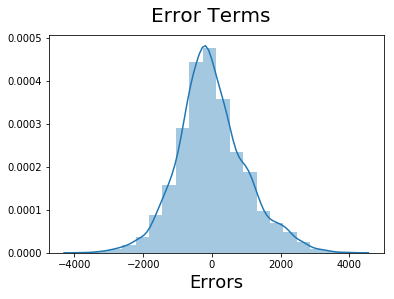

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residuals are normally distributed

Accuracy of training dataset

In [92]:
mae=mean_absolute_error(y_train,y_train_pred)
print("mean_absolute_error = ",round(mae,2))
r2=r2_score(y_train,y_train_pred)
print("R-square = ",round(r2,2))
mse=mean_squared_error(y_train,y_train_pred)
print("mean_squared_error = ",round(mse,2))

mean_absolute_error =  767.78
R-square =  0.56
mean_squared_error =  1000532.73


In [93]:
new_columns = new_columns[1:]
new_columns

[0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 22]

Accuracy of Testing dataset

In [94]:
# Testing
y_test_pred = lm.predict(X_test_pca[new_columns])

In [95]:
mae=mean_absolute_error(y_test,y_test_pred)
print("mean_absolute_error = ",round(mae,2))
r2=r2_score(y_test,y_test_pred)
print("R-square = ",round(r2,2))
mse=mean_squared_error(y_test,y_test_pred)
print("mean_squared_error = ",round(mse,2))

mean_absolute_error =  779.93
R-square =  0.53
mean_squared_error =  1032074.82


Prediction of Testing data

In [96]:
# Testing
y_test_unknown_pred = lm.predict(X_test_unknown_pca[new_columns])
y_test_unknown_pred

array([1347.14910794,  343.27562272, 3402.89580548, ...,  861.13771982,
       2075.40110795,  296.71657996])

#### 16).Regularized Linear Regression

Training

In [97]:
# Linear model
lr=LinearRegression()
lr.fit(X_train_pca,y_train)
print("LR Coefficients :",lr.coef_)

LR Coefficients : [   48.95506011   392.33675162  -238.70236301  -387.9746699
   260.23254119   110.67198955   152.0364852  -1534.23077454
  -173.52356807   487.24231248   382.24980282   253.62207511
   488.59744086  2789.07858107  1548.59935544   160.57594383]


In [98]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train_pca,y_train)
print("Ridge Coefficient :",ridge.coef_)

Ridge Coefficient : [   48.95429393   392.32089726  -238.69215969  -387.9553609
   260.21729924   110.66531589   152.02593872 -1534.08784049
  -173.50234789   487.16682027   382.18709794   253.5777187
   488.50765782  2788.4740656   1548.22398051   160.47052299]


In [99]:
#Lasso Model
lasso=Lasso(alpha=0.1)
lasso.fit(X_train_pca,y_train)
print("Lasso Coefficient :",lasso.coef_)

Lasso Coefficient : [   48.8506841    392.06724595  -238.41728468  -387.64274584
   259.8419116    110.26981656   151.57383733 -1533.60941038
  -172.70791702   486.20887281   381.15562979   252.45551803
   487.37174239  2787.63280334  1546.98242181   156.19475545]


Accuracy on training and testing data

In [100]:
print('Linear Regression on training data',lr.score(X_train_pca,y_train))
print('Linear Regression on testing data',lr.score(X_test_pca[new_columns],y_test))
print("-"*70)
print('Ridge Regression on training data',ridge.score(X_train_pca,y_train))
print('Ridge Regression on testing data',ridge.score(X_test_pca[new_columns],y_test))
print("-"*70)
print('Lasso Regression on training data',lasso.score(X_train_pca,y_train))
print('Lasso Regression on testing data',lasso.score(X_test_pca[new_columns],y_test))

Linear Regression on training data 0.5614467023546519
Linear Regression on testing data 0.5338416236462701
----------------------------------------------------------------------
Ridge Regression on training data 0.5614466849700427
Ridge Regression on testing data 0.5338452771570887
----------------------------------------------------------------------
Lasso Regression on training data 0.5614460165105121
Lasso Regression on testing data 0.5338874374330224


#### 17).RandomForest

Hyper parameter tunning

without feature scalling

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [106]:
X_train.shape

(6669, 1601)

In [107]:
# Define model and hyperparameter grid
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [5,10],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [1200,1300,1400,1600,1700,1800,1900],
    'min_samples_split': [11,14,20,25,35,50],
    'min_samples_leaf': [1,5,10]
}


grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_cv.fit(X_train, y_train)

# Get the best parameters
best_params = grid_cv.best_params_

In [108]:
# Training Accuracy
y_train_pred = grid_cv.predict(X_train)

print("Best parameters:", best_params)
# mae=mean_absolute_error(y_train,y_train_pred)
# print("mean_absolute_error = ",round(mae,2))
r2=r2_score(y_train,y_train_pred)
print("R-square = ",round(r2,2))
# mse=mean_squared_error(y_train,y_train_pred)
# print("mean_squared_error = ",round(mse,2))

Best parameters: {'max_depth': 1600, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 14, 'n_estimators': 10}
R-square =  0.82


In [109]:
# Testing Accuracy
y_test_pred = grid_cv.predict(X_test)
# mse = mean_squared_error(y_eval, y_eval_pred)
r2=r2_score(y_test,y_test_pred)

# print("Mean Squared Error:", mse)
print("R-square = ", round(r2,2))

R-square =  0.54


In [110]:
grid_cv.predict(X_test)

array([2520.96159273, 2596.58905063, 1712.68355864, ..., 1929.55255133,
        223.84972839, 1213.40208929])

#### 19).Summary:<br>


Linear model accuracy for training data set is 0.56 and for testing data is  0.53<br>
Ridge regression accuracy for training data set is 0.5614 and for testing data is  0.5338<br>
Lasso  regression accuracy for training data set is 0.5614 and for testing data is  0.5338<br>
Random forest accuracy  for training data set is 0.82 and for testing data is  0.54<br>

Random forest gives higher accuracy for training dataset but quite lower accuracy for testing dataset
    

In [111]:
# import pickle

# model_pkl_file = "Random_Forest_model.pkl"  
# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(model, file)

# model_pkl_file = "Linear_Regression_model.pkl"  
# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(lm, file)

# model_pkl_file = "Ridge_Regression_model.pkl"  
# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(ridge, file)

# model_pkl_file = "Lasso_Regression_model.pkl"  
# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(lasso, file)